In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-dataset/Amazon.csv


Amazon Sales Exploratory Analysis 

In [2]:
df=pd.read_csv("/kaggle/input/amazon-sales-dataset/Amazon.csv")

In [3]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹259,₹999,74%,4,43,The battery operated milk frother is easy to c...,"AFSZEPUJZUDS3NRVEAO5MHUCAEPA,AHU7IIQ2UVTKGV6WW...","Priti Sharma,ramya,Aman,ShashankVerma,Ved,Sush...","R35KB9ZGJU69DM,R2WAUSC1WTJAI1,R3602Y24JS49JI,R...","Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,https://m.media-amazon.com/images/I/41sJ4KQa5x...,https://www.amazon.in/WIDEWINGS-Electric-Handh...
1461,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹1,299","₹2,495",48%,2,2,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237..

In [4]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [5]:
df.tail(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹259,₹999,74%,4,43,The battery operated milk frother is easy to c...,"AFSZEPUJZUDS3NRVEAO5MHUCAEPA,AHU7IIQ2UVTKGV6WW...","Priti Sharma,ramya,Aman,ShashankVerma,Ved,Sush...","R35KB9ZGJU69DM,R2WAUSC1WTJAI1,R3602Y24JS49JI,R...","Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,https://m.media-amazon.com/images/I/41sJ4KQa5x...,https://www.amazon.in/WIDEWINGS-Electric-Handh...
1461,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹1,299","₹2,495",48%,2,2,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-ORFin-heater-Hom...
1462,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹279,₹499,44%,4.8,28,-Make delicious milk foam creamer for your dri...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","Amazon Customer,Neha Mehta,Nischal Agarwal,tha...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...","Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Oratech-electric-cappucc...
1463,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
1464,B0BR4F878Q,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...","₹1,439","₹1,999",28%,4.8,"53,803",✔Quick Electric Hot Water Tap Heating tube: hi...,"AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NM...","Yogita g.,Amazon Customer,Mimsy","R2WHW4PEF14WOD,R2DCCZWUGI0O0K,R1FA1HH6VL1RAL","Best Product,It’s expansive but it works well ...",Must buy best Fabulous product I recommend thi...,https://m.media-amazon.com/images/I/41+t2HWvwF...,https://www.amazon.in/Swiffer-Instant-Electric...


In [6]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [7]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,26,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B077Z65HSD,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,60%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [8]:
# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [9]:
# Remove rows with missing values in specific columns
df.dropna(subset=['product_name', 'rating'], inplace=True)


In [10]:
# Remove all rows with null values in any column
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [12]:
# Question 1: How many rows and columns are in the dataset?
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")


Number of rows: 1463, Number of columns: 16


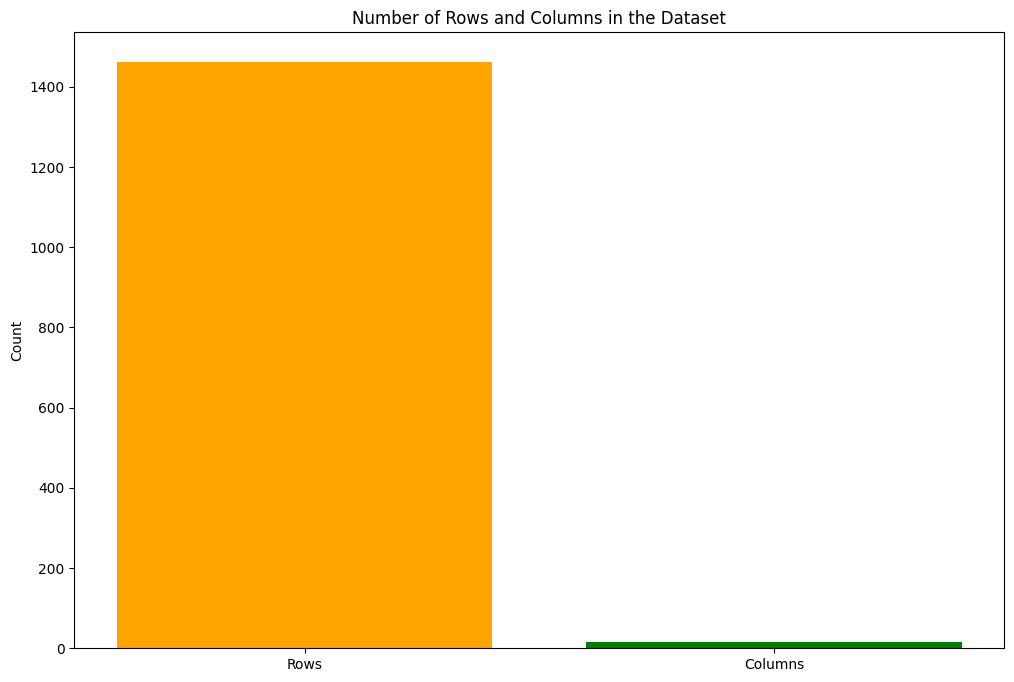

In [13]:
# Bar chart for the number of rows and columns
plt.figure(figsize=(12, 8))
plt.bar(['Rows', 'Columns'], [num_rows, num_columns], color=['orange', 'green'])
plt.title('Number of Rows and Columns in the Dataset')
plt.ylabel('Count')
plt.show()


In [14]:
# Question 2: What are the data types of each column?
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [15]:
# Question 3: What is the average discount percentage across all products (as a float)?
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)  # Convert to float
average_discount_percentage = df['discount_percentage'].mean()
print(f"Average discount percentage: {average_discount_percentage:.2f}%")

Average discount percentage: 47.65%


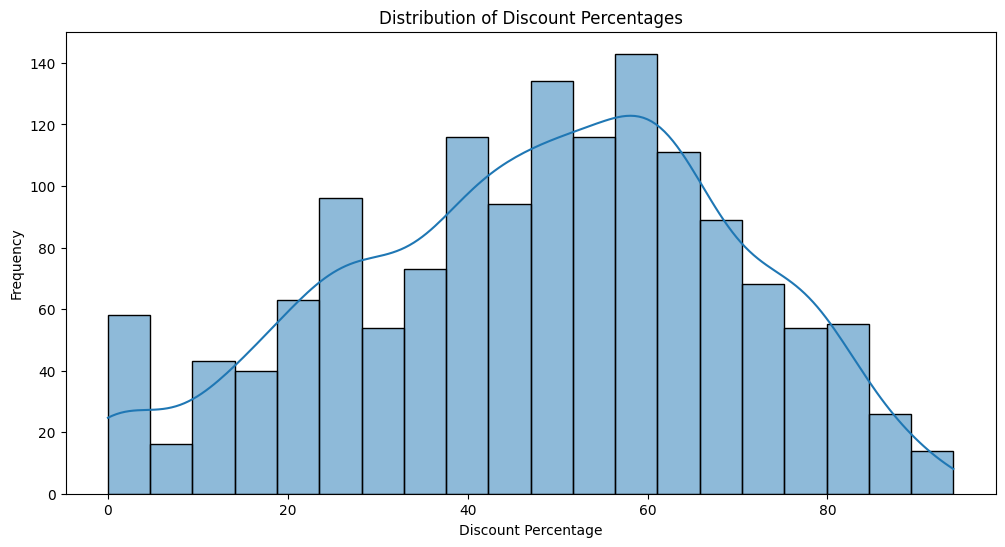

In [16]:
# Distribution of discount percentages
plt.figure(figsize=(12, 6))
sns.histplot(df['discount_percentage'], bins=20, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()


In [17]:
# Question 4: What is the highest-rated product and its rating?
highest_rated_product = df[df['rating'] == df['rating'].max()]
print(f"Highest-rated product: {highest_rated_product['product_name'].values[0]}, Rating: {highest_rated_product['rating'].values[0]}")


Highest-rated product: Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red), Rating: |


In [18]:
# Question 5: How many unique product categories are there?
unique_categories = df['category'].nunique()
print(f"Number of unique categories: {unique_categories}")

Number of unique categories: 211


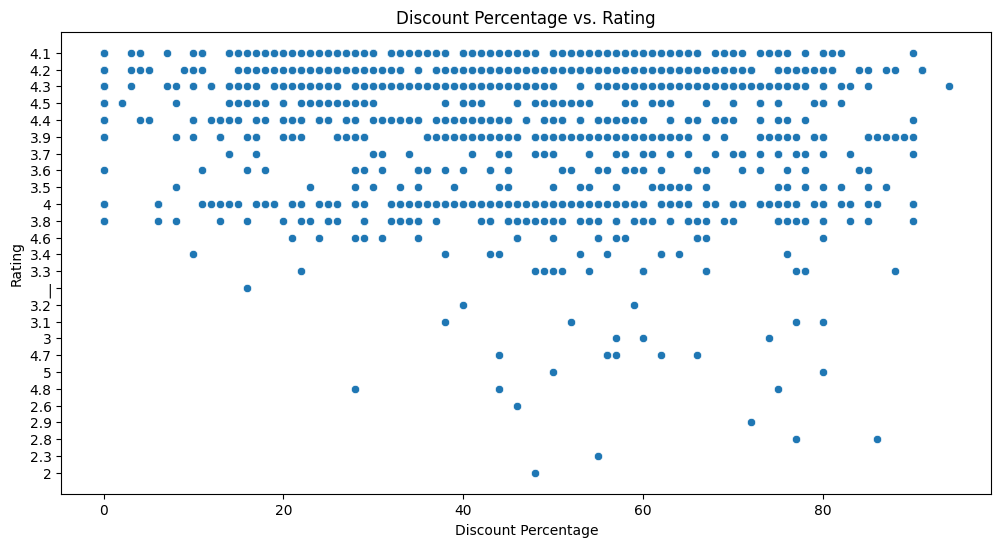

In [19]:
# Question 6: What is the correlation between discounted_price and rating?
plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df)
plt.title("Discount Percentage vs. Rating")
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.show()



In [20]:
# Question 7: What is the most common category in the dataset?
most_common_category = df['category'].mode().values[0]
print(f"Most common category: {most_common_category}")


Most common category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables


In [21]:
# Question 8: What is the average rating for products in the 'Electronics' category?
average_rating_electronics = df[df['category'] == 'Electronics']['rating'].mean()
print(f"Average rating for Electronics category: {average_rating_electronics:.2f}")



Average rating for Electronics category: nan


In [22]:
# Question 9: How many unique users have reviewed products?
unique_users = df['user_id'].nunique()
print(f"Number of unique users who reviewed products: {unique_users}")



Number of unique users who reviewed products: 1192


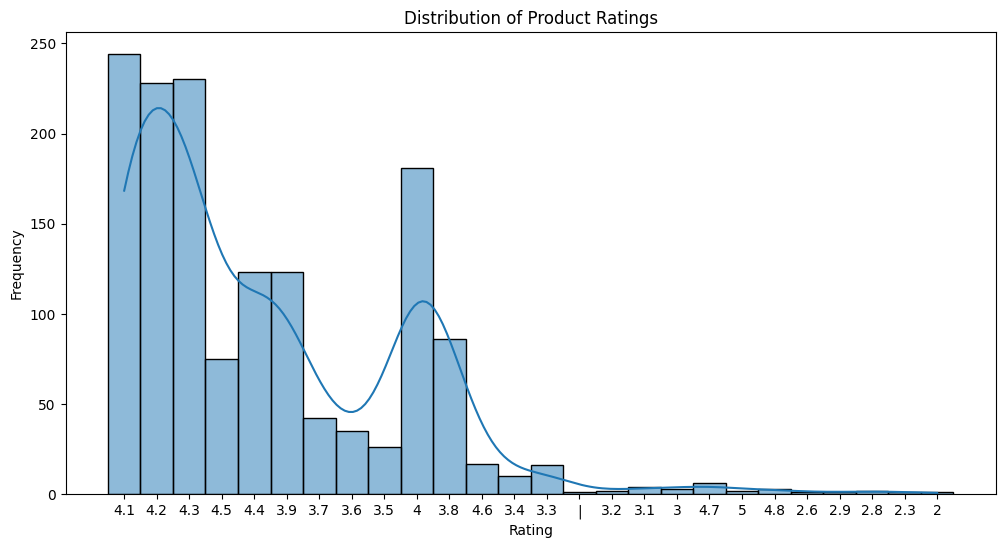

In [23]:
# Question 10: What is the distribution of product ratings?
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



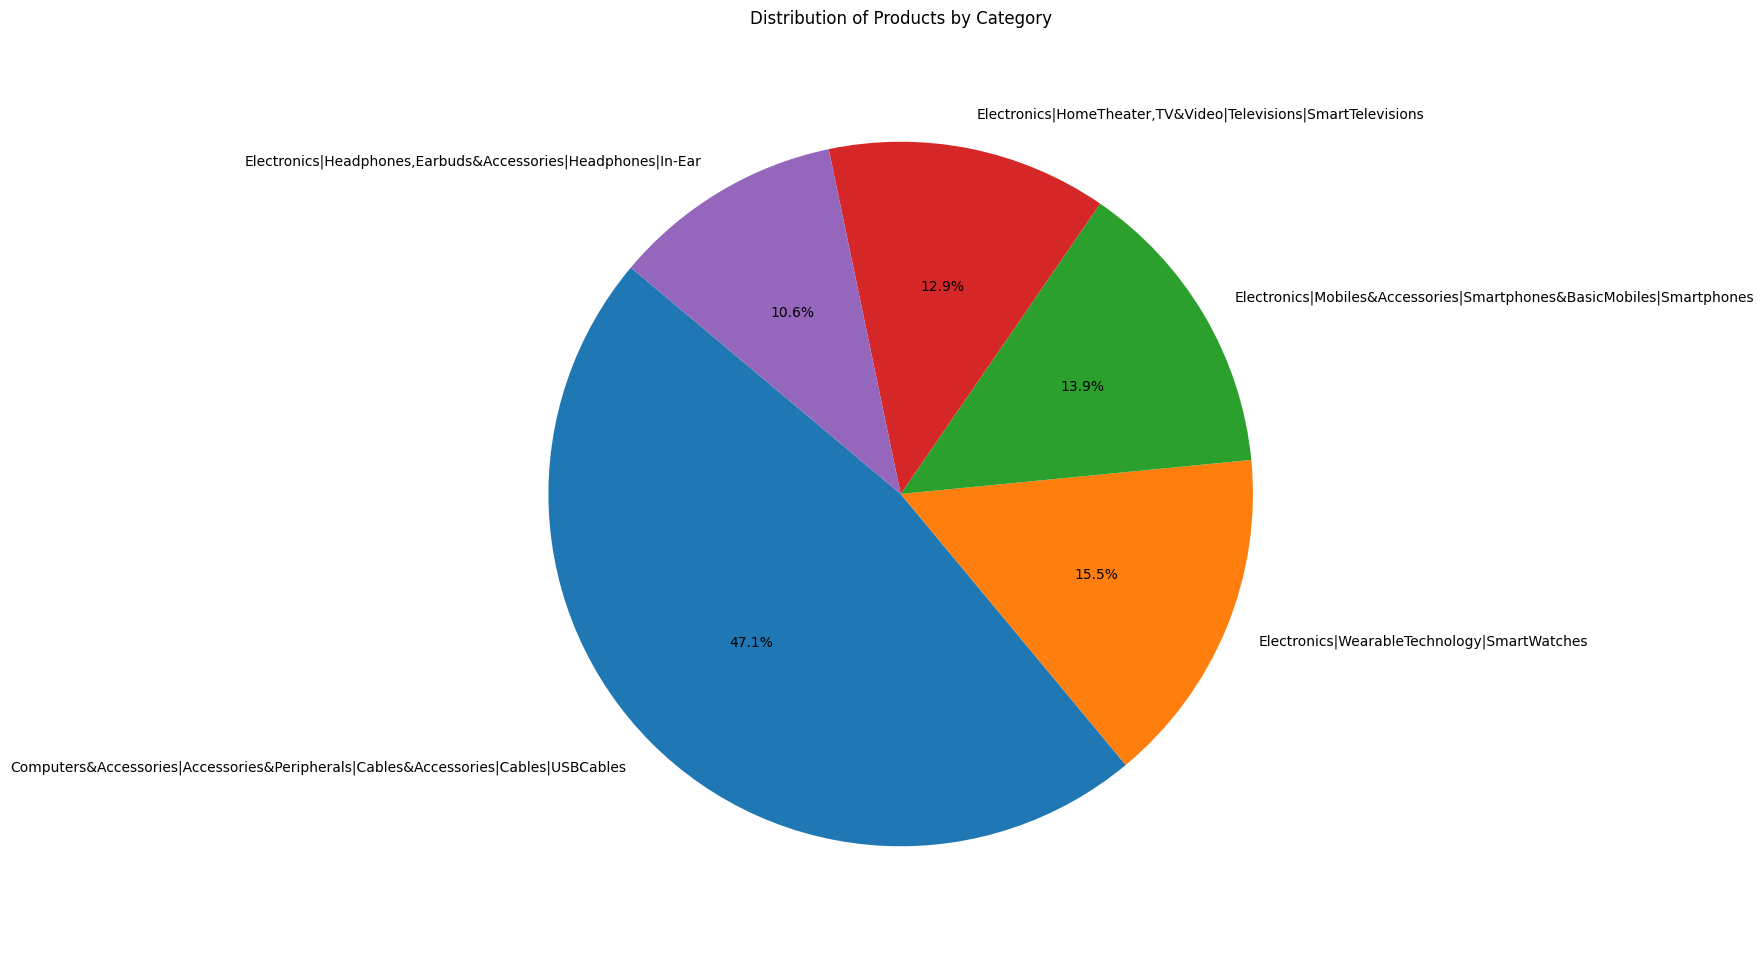

In [24]:
# Visualization 5: Pie chart of category distribution
category_counts = df['category'].value_counts().head(5)
plt.figure(figsize=(10, 12))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by Category')
plt.axis('equal')
plt.show()

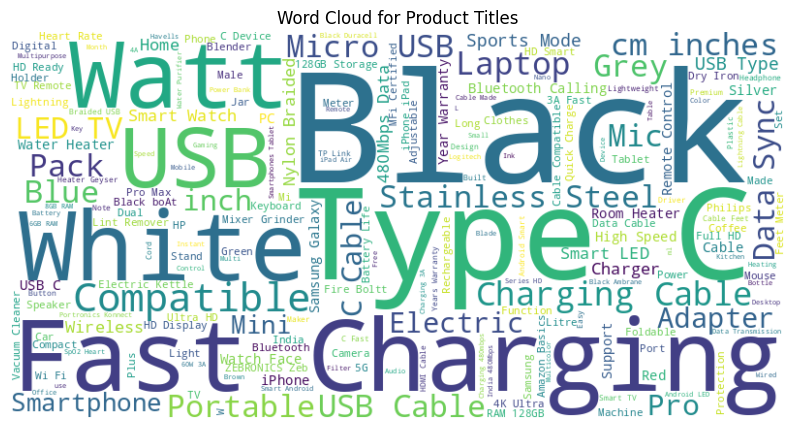

In [25]:
from wordcloud import WordCloud
# Word Cloud for Product Titles and Reviews
title_text = ' '.join(df['product_name'])
# Visualization: Word cloud for product titles
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Product Titles')
plt.axis('off')
plt.show()

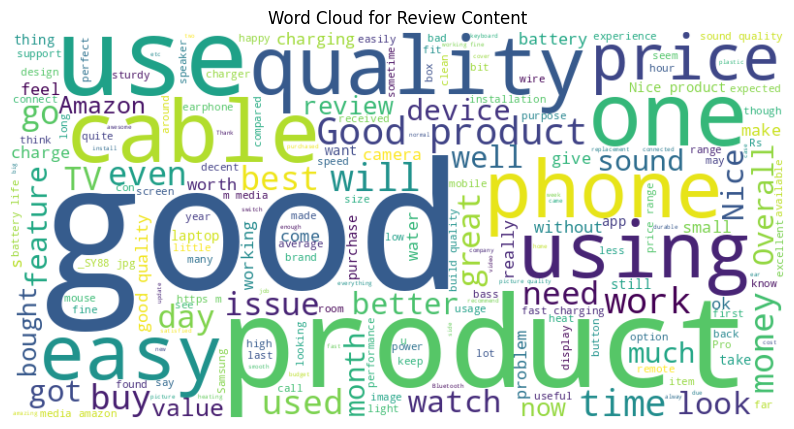

In [26]:
review_text = ' '.join(df['review_content'])
# Visualization: Word cloud for review content
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Review Content')
plt.axis('off')
plt.show()


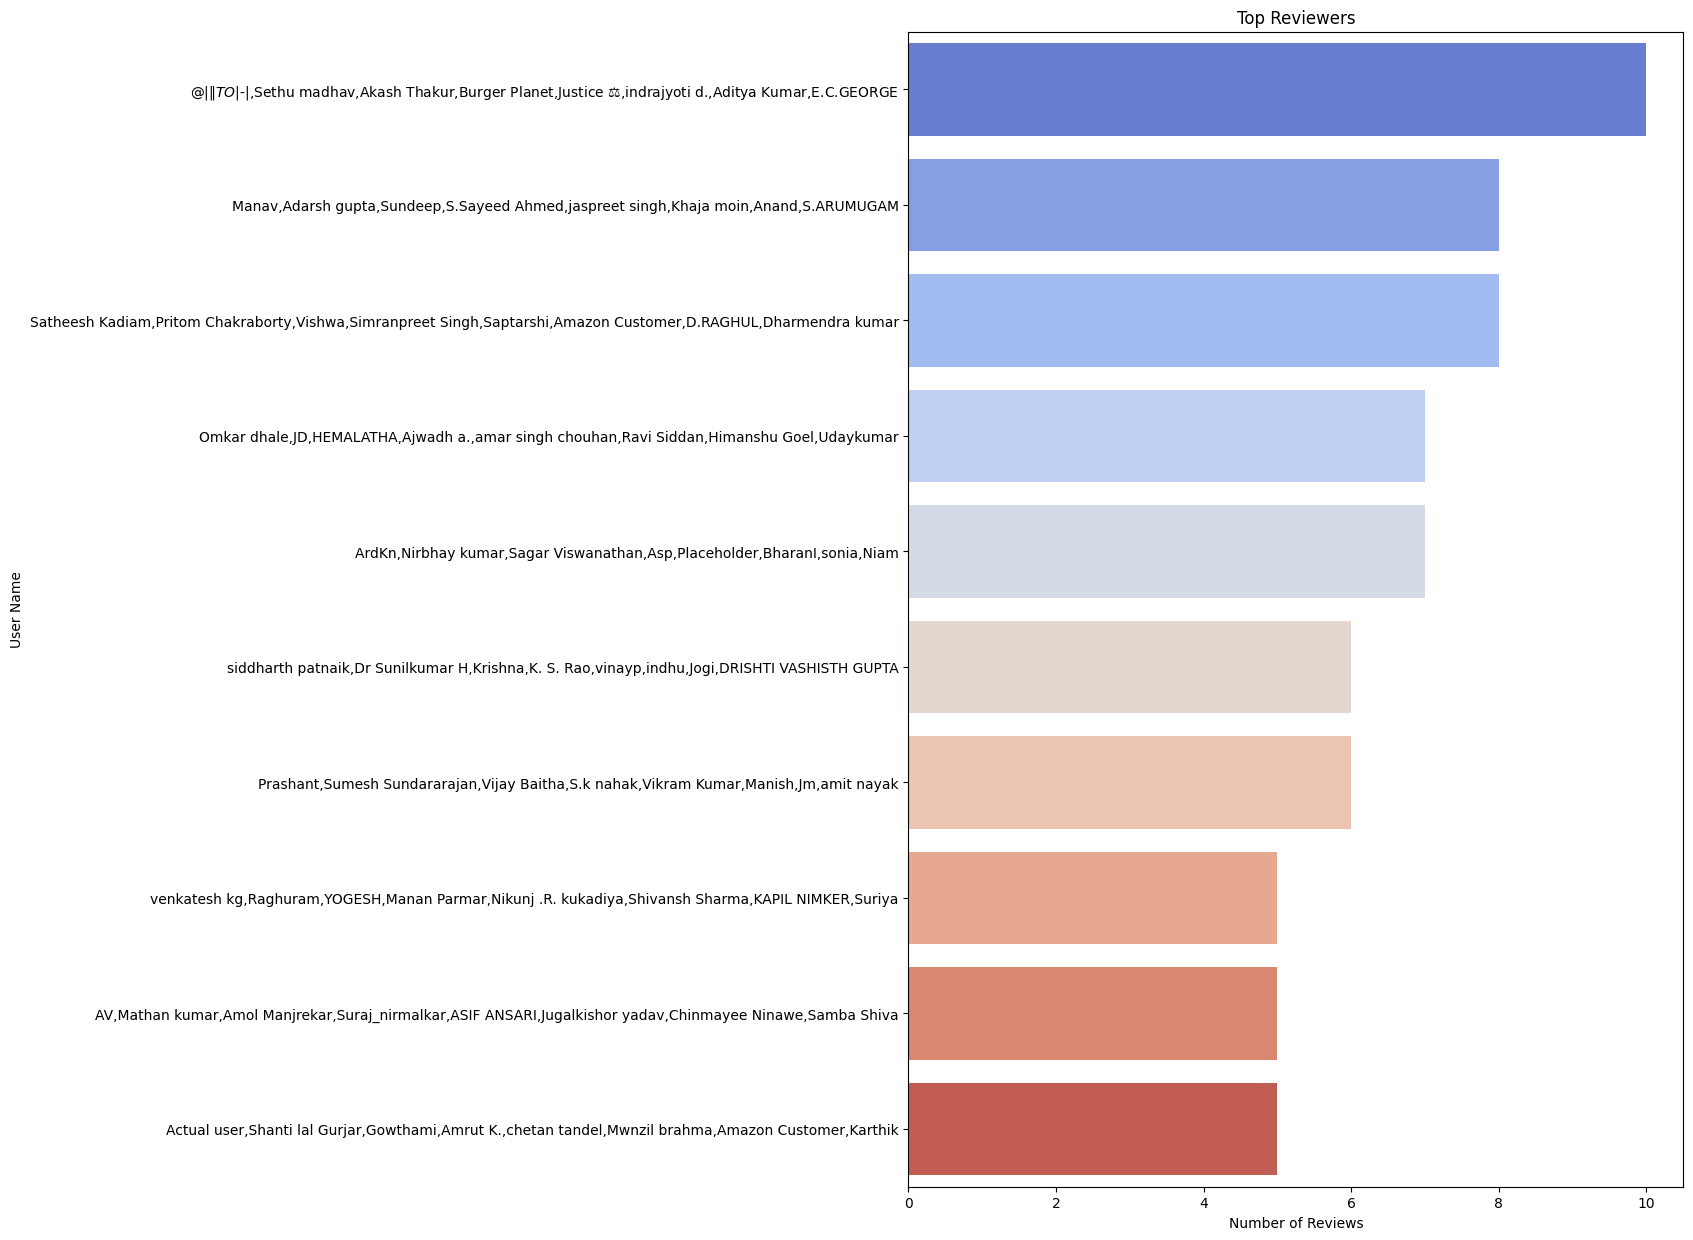

In [27]:
# Top Reviewers
top_reviewers = df['user_name'].value_counts().head(10)

# Visualization: Bar plot of top reviewers
plt.figure(figsize=(10, 15))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='coolwarm')
plt.title('Top Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('User Name')
plt.show()


**THANK YOU**